In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [217]:
tickers=["MGLU3.SA", "GGBR4.SA"]

In [216]:
def download_data(ticker, start_date):
    data=yf.download(ticker, start=start_date)['Adj Close']

In [ ]:
log_returns=np.log(1+data.pct_change(1)).dropna()
log_returns_mean=log_returns.mean()
log_returns_var = log_returns.var()

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

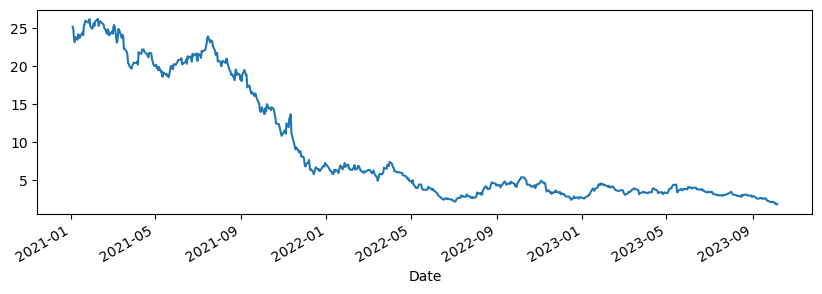

In [195]:

data.plot(figsize=(10,3))

In [198]:
log_returns_mean

-0.003845436535269972

<Axes: xlabel='Date'>

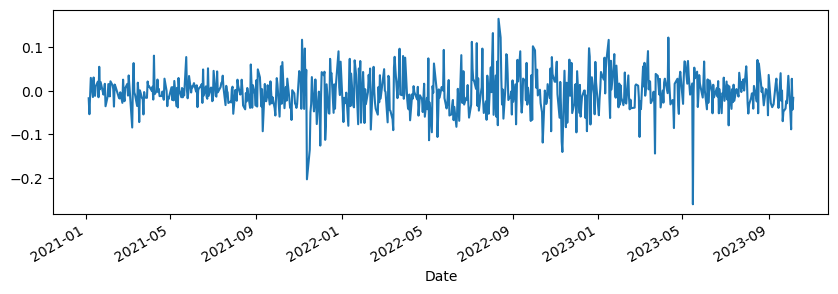

In [199]:
log_returns.plot(figsize=(10,3))

In [200]:
log_returns_var = log_returns.var()
log_returns_var

0.0019526473417217829

In [201]:
# drift = melhor aproximaxçao das taxas futuras de um ativo
# drifit = retorno_log_medio-((1/2)*variancia)
drift = log_returns_mean-(0.5*log_returns_var)


-0.004821760206130864

In [202]:
log_returns_std = log_returns.std()
log_returns_std

0.04418876940718968

In [203]:
from scipy.stats import norm

In [204]:
# procentagem de chance de um evento ocorrer
# funçao norm.ppf calcula essa distancia
pct_chance_ocorrer=95/100
norm.ppf(pct_chance_ocorrer)

1.6448536269514722

In [205]:
#criando cenarios aleatorios de probabilidades para simulaçoes
Z = np.random.rand(10,2)

In [206]:
intervalo_dias_futuros = 100
cenarios = 3

In [207]:
#daily_future_returns = (np.exp(drift.values + log_returns_std.values * 
#                              norm.ppf(np.random.rand(intervalo_dias_futuros,cenarios))))

daily_future_returns = (np.exp(drift + log_returns_std * 
                             norm.ppf(np.random.rand(intervalo_dias_futuros,cenarios))))

In [208]:
daily_future_returns

array([[1.04203826, 0.97475661, 1.05676202],
       [0.99970587, 1.0370218 , 1.0371081 ],
       [0.99250291, 0.97758656, 1.00713239],
       [0.95714022, 0.98373121, 0.99486592],
       [1.03739184, 0.99614326, 1.00274341],
       [1.07248398, 0.97583848, 0.97631329],
       [0.98851066, 1.03927439, 0.96944341],
       [1.00864954, 1.01420838, 0.89503238],
       [1.02448334, 0.98764499, 0.9798945 ],
       [0.96262464, 0.97263654, 1.05114934],
       [0.96605137, 0.96708294, 1.05385223],
       [0.99849603, 1.00479498, 1.00189338],
       [0.96924603, 0.91968792, 1.01297971],
       [0.95788381, 0.9072232 , 0.97103683],
       [0.97479623, 1.06005609, 0.98587745],
       [1.00952646, 1.07434568, 1.04189404],
       [0.88467744, 1.06558558, 0.98641327],
       [1.07179855, 1.04329611, 1.05910168],
       [0.98662678, 0.87082175, 1.06424871],
       [1.02667029, 0.886164  , 0.993769  ],
       [0.96737033, 1.0368327 , 1.02184938],
       [1.00045387, 1.11463188, 1.00332053],
       [0.

In [209]:
price_list=np.zeros_like(daily_future_returns)

In [214]:
price_list[0] = data.iloc[-1]

In [211]:
for t in range(1,intervalo_dias_futuros):
    price_list[t] = price_list[t -1]*daily_future_returns[t]

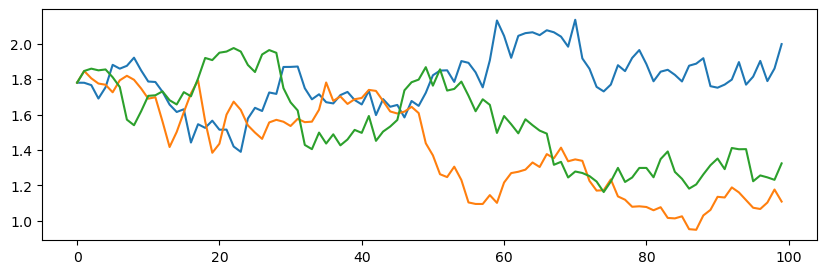

In [212]:
plt.figure(figsize=(10,3))
plt.plot(price_list)

In [213]:
print("Sumario para os proximos", intervalo_dias_futuros, "dias")
print()
print(ticker[0])
print("-------------------------------------")
print()
print("Preço Otimista:", round(price_list.max(),2))
print("Preço medio:", round(price_list.mean(),2))
print("Preço minimo:",round(price_list.min(),2))


Sumario para os proximos 100 dias

MGLU3.SA
-------------------------------------

Preço Otimista: 2.14
Preço medio: 1.58
Preço minimo: 0.95
